
# Diagnose und Klassifikation von Diabetes mellitus mithilfe maschinellen Lernens

Hier finden Sie den gesamten Code, den der Autor für seine Analyse verwendet hat.

Auch einzusehen unter: https://github.com/NicoPiel/LiteraturSeminar

In [25]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set_theme()

In [26]:
# Daten importieren
data = pd.read_csv('data/diabetes.csv')

# Nullen durch NaN ersetzen
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["BMI"] = data["BMI"].replace(0, np.nan)
data["DiabetesPedigreeFunction"] = data["DiabetesPedigreeFunction"].replace(0, np.nan)
data["Age"] = data["Age"].replace(0, np.nan)

# NaN Werte imputieren
imputer = SimpleImputer()

data_imputed = pd.DataFrame(imputer.fit_transform(data))
data_imputed.columns = data.columns

# Vorbereitung

Als erstes möchten wir uns ein wenig Übersicht verschaffen, also Data Exploration betreiben.

In [27]:
# Spalten

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
# Übersicht verschaffen

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2750.000000,2643.000000,1968.000000,1438.000000,2729.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.895273,72.404086,29.289634,154.237830,32.596665,0.471193,33.132225,0.343931
std,3.323801,30.600655,12.268576,10.711518,113.339578,7.154020,0.325669,11.777230,0.475104
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Die einzelnen Spalten haben folgende Bedeutung:

- **Pregnancies:** Anzahl der bisherigen (erfolgreichen und gescheiterten) Schwangerschaften
- **Glucose:** 75g-2-h-oGTT in $\frac{\text{mg}}{\text{dl}}$. Glukosewert nach 75g Kohlenhydraten und zwei Stunden Wartezeit
- **BloodPressure:** Diastolischer Blutdruck in $\text{mm} \cdot \text{Hg}$
- **SkinThickness:** Dicke der Trizepshautfalte in $\text{mm}$
- **Insulin:** Seruminsulin nach 2 Stunden in $\frac{\text{µU}}{\text{ml}}$
- **BMI:** Body-Mass-Index in $\frac{\text{kg}}{\text{m}^2}$
- **DiabetesPedigreeFunction:** Stammbaumfunktion des Patienten
- **Age:** Alter in Jahren
- **Outcome:** Klassifikation. 1 = Diabetes, 0 = kein Diabetes

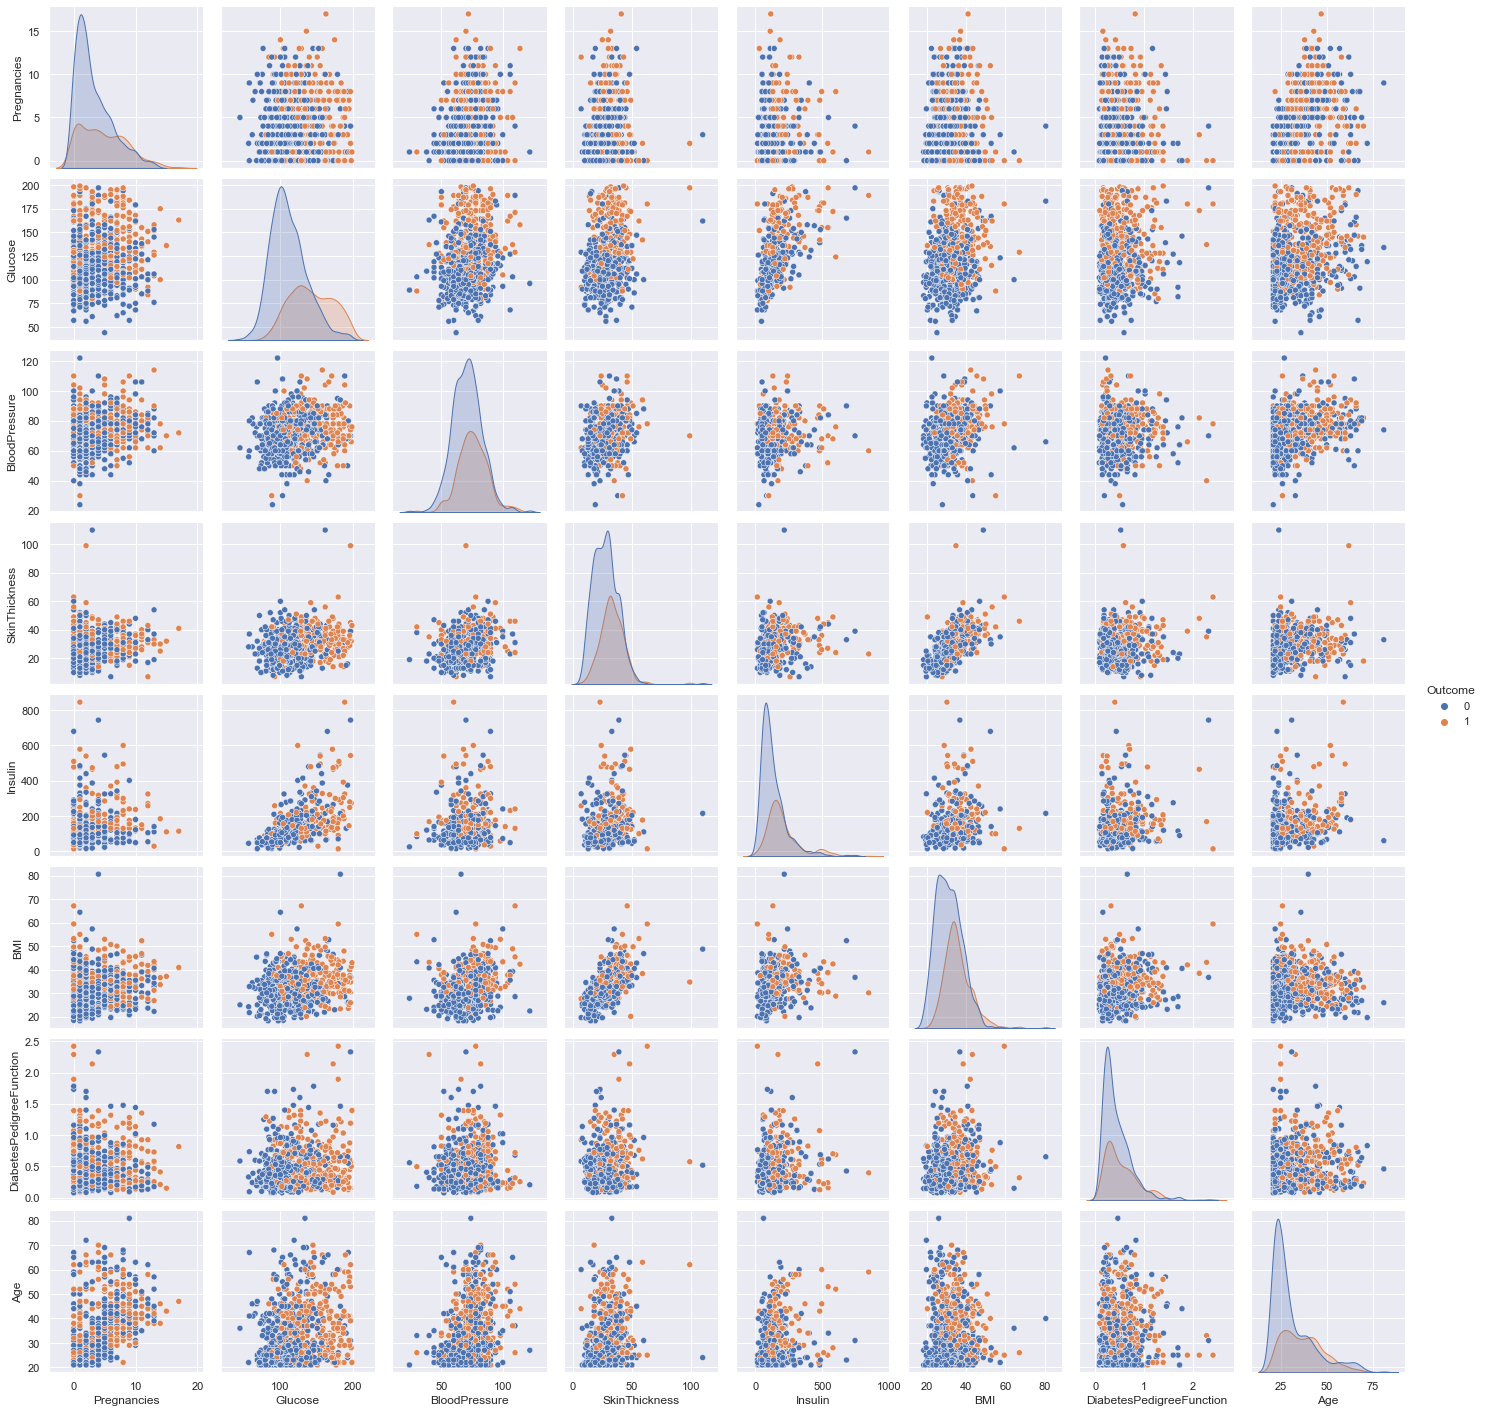

In [30]:
# Keine sichtbare Beziehung zwischen

sns.pairplot(data = data, hue="Outcome")